# Spark Context

SparkContext is the **primary point of entry for Spark capabilities**. A SparkContext represents a **Spark cluster’s connection that is useful in building RDDs, accumulators, and broadcast variables on the cluster**. It enables your Spark Application to connect to the Spark Cluster using Resource Manager. Also, before the creation of SparkContext, SparkConf must be created. 

- SparkContext represents connection to spark cluster, can create RDDs, accelerator & broadcast variables on the cluster
- Only 1 SparkContext may be active per JVM
- You must stop() active SparkContext before creating new one.

In [1]:
from pyspark import SparkContext, SparkConf

# First way of creating SparkContext

In [2]:
conf = SparkConf().setAppName('RDD_Test').setMaster("local")
sc = SparkContext(conf=conf)

In [3]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'),
 ('spark.driver.host', 'Krithin'),
 ('spark.app.submitTime', '1674379483369'),
 ('spark.executor.id', 'driver'),
 ('spark.app.id', 'local-1674379485883'),
 ('spark.app.name', 'RDD_Test'),
 ('spark.driver.p

In [4]:
sc.stop()

# Second way, create sparkContext that loads settings

In [6]:
sc = SparkContext()

In [7]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'),
 ('spark.app.startTime', '1674380718826'),
 ('spark.driver.host', 'Krithin'),
 ('spark.app.submitTime', '1674379483369'),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'RDD_Test'),
 ('spark.rdd.com

In [8]:
sc.stop()

# Third way of combining both

In [9]:
sc = SparkContext("local","First App")

# Working with RDD

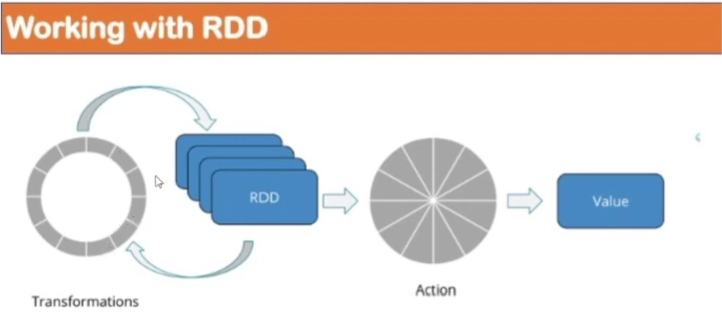

## RDD - Transform & Action

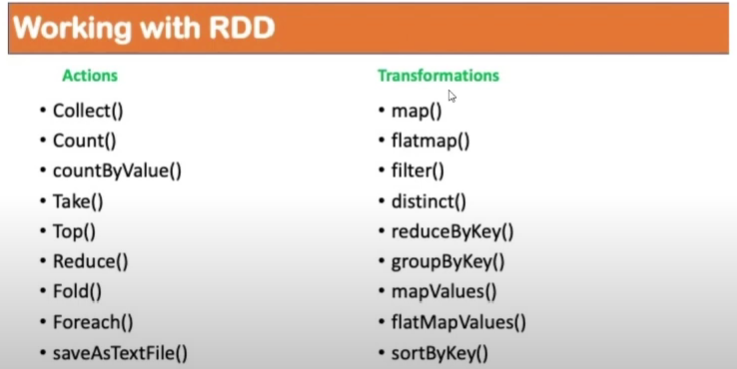

# Create RDD and their basic actions

In [12]:
names = sc.parallelize(['Adam','cray','Shaun','Brain','Mark','Christ','Shail','Satya','Mark','Norby','Frans','Mark','Bill'])

In [13]:
type(names)

pyspark.rdd.RDD

## Collect

We shouldn't be using collect since **all data will be loaded in RAM** which doesn't serve the purpose of Spark

In [16]:
a = names.collect()

In [20]:
print(type(a))
a

<class 'list'>


['Adam',
 'cray',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

## Count Value

In [14]:
names.countByValue()

defaultdict(int,
            {'Adam': 1,
             'cray': 1,
             'Shaun': 1,
             'Brain': 1,
             'Mark': 3,
             'Christ': 1,
             'Shail': 1,
             'Satya': 1,
             'Norby': 1,
             'Frans': 1,
             'Bill': 1})

In [21]:
a=sc.parallelize([1,2,3,4,5]).foreach(lambda x: print(x))

In [22]:
type(a)

NoneType

## Take

In [30]:
names.take(5)

['Adam', 'cray', 'Shaun', 'Brain', 'Mark']

In [47]:
employees = sc.textFile("employees.txt")

In [48]:
type(employees)

pyspark.rdd.RDD

In [49]:
employees.collect()

['Adam',
 'cray',
 'Shaun',
 'Brain',
 'Mark',
 'Christ',
 'Shail',
 'Satya',
 'Mark',
 'Norby',
 'Frans',
 'Mark',
 'Bill']

## Distinct count

In [50]:
employees.distinct().count()

11

**Taking Number for better clarity**

In [52]:
num = sc.parallelize([5,5,4,3,2,9,2])
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [53]:
num.countByValue()

defaultdict(int, {5: 2, 4: 1, 3: 1, 2: 2, 9: 1})

In [54]:
type(num)

pyspark.rdd.RDD

## Reduce

Though it works, there will be lot of shuffles between partitions for comparisons.Thats not good, particularly for large data.

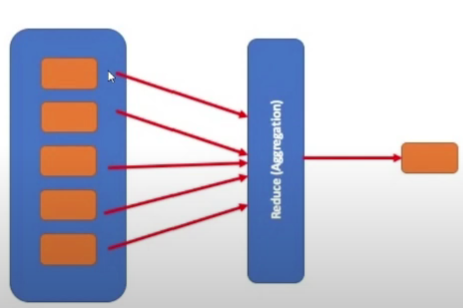

In [69]:
dataList = [50.0,40.0,40.0,70.0]
dataRDD = sc.parallelize(dataList)  
maxValue =  dataRDD.reduce(max)
maxValue

70.0

In [86]:
num = sc.parallelize([5,5,4,3,2,9,2],3)
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [79]:
num.reduce(lambda a,b:a+b)

30

In [80]:
num.reduce(lambda a,b:a*b)

10800

In [81]:
num.reduce(lambda x,y: x if x > y else y)

9

In [82]:
def myfun(a,b):
    return a*2+b*2

In [83]:
num.reduce(myfun)

232

In [87]:
num.takeOrdered(3) # Take(3) will pick 1st 3 data whereas takeOrdered(3) - First Sort RDD & pick 3 elements

[2, 2, 3]

## Fold

Initial for accumulated result of each partition for the op operator, and also initial value for combine results from different partition.

**Reduce will just do the operation. Fold will initialize & perform operation**

In [95]:
num = sc.parallelize([5,5,4,3,2,9,2],3)
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [96]:
num.glom().collect()

[[5, 5], [4, 3], [2, 9, 2]]

In [98]:
num.reduce(lambda a,b:a+b)

30

In [93]:
num.fold(1, lambda a,b: a+b) # 3 partition+1 whole array, it adds 1 for each partition

34

In [103]:
num = sc.parallelize([5,5,4,3,2,9,2],2)
print(num.glom().collect())
num.fold(2, lambda a,b: a+b) # 2 partition+1 whole array, it adds 2 for each partition. 3(# of partitions) - 2+2+2(folds value)

[[5, 5, 4], [3, 2, 9, 2]]


36

In [101]:
num.reduce(lambda a,b:a*b)

10800

In [104]:
num.fold(2,lambda a,b:a*b) # 2 partition+1 whole array, it adds 2 for each partition. 3(# of partitions)=2*2*2=8

86400

In [107]:
num.fold(1,lambda a,b:a*b) # 2 partition+1 whole array, it adds 2 for each partition. 3(# of partitions)=1*1*1=1

10800

In [106]:
10800*8

86400

In [109]:
from operator import add,mul
num.fold(1,add)

33

In [110]:
num.fold(2,mul)

86400

## GLOM: RDD OF TUPLES

glom() transforms each partition into a tuple (immutabe list) of elements. It creates an RDD of tuples. One tuple per partition.

Let’s rephrase our solution like as follows. Rather than comparing all the values, we can

- First find maximum in each partition
- Compare maximum value between partitions to get the final max value

In [71]:
num = sc.parallelize([5,5,4,3,2,9,2],3)

In [72]:
type(num.glom())

pyspark.rdd.PipelinedRDD

In [73]:
num.glom().collect()

[[5, 5], [4, 3], [2, 9, 2]]

In [74]:
num.glom().collect()[1]

[4, 3]

## Math operations - MIN, MAX, MEAN

In [75]:
num.min()

2

In [76]:
num.max()

9

In [77]:
num.mean()

4.285714285714286